## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 
import seaborn as sns 

## Importing the CSV file

In [2]:
df=pd.read_csv(r"C:\Users\sss\Downloads\Deep_Learning related\DL_CLASS\ASSIGNMENT_4\Multiple CSV\5.outlier.csv",header=None) 
df.head() 

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


In [4]:
df[2].value_counts()  

2
0    300
1    300
Name: count, dtype: int64

## Seperating the Input and Output Features

In [5]:
x=df.iloc[:,0:2]
y=df.iloc[:,2] 

In [6]:
x.head() 

,0,1
0,-17.897000,7.662423
1,-26.343161,-3.055257
2,-19.059771,-8.531838
3,-16.383898,-2.352667
4,-12.926541,9.074994


In [7]:
y.head() 

0    0
1    0
2    0
3    0
4    0
Name: 2, dtype: int64

## Split the data into train and test

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 

In [9]:
x_train.shape  

(480, 2)

In [10]:
x_test.shape 

(120, 2)

### Standardising input features

In [11]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)   

### Build the Logical Structure 

In [12]:
model=Sequential()
model.add(Dense(5,activation="tanh",input_dim=2))
model.add(Dense(3,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [13]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model 

In [14]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=20,validation_split=0.1) 

Epoch 1/20
44/44 [==============================] - 2s 13ms/step - loss: 0.8078 - accuracy: 0.2083 - val_loss: 0.6844 - val_accuracy: 0.5417
Epoch 2/20
44/44 [==============================] - 0s 5ms/step - loss: 0.5957 - accuracy: 0.7384 - val_loss: 0.5038 - val_accuracy: 0.9167
Epoch 3/20
44/44 [==============================] - 0s 5ms/step - loss: 0.4429 - accuracy: 0.9630 - val_loss: 0.3808 - val_accuracy: 1.0000
Epoch 4/20
44/44 [==============================] - 0s 5ms/step - loss: 0.3398 - accuracy: 1.0000 - val_loss: 0.2985 - val_accuracy: 1.0000
Epoch 5/20
44/44 [==============================] - 0s 5ms/step - loss: 0.2699 - accuracy: 1.0000 - val_loss: 0.2414 - val_accuracy: 1.0000
Epoch 6/20
44/44 [==============================] - 0s 5ms/step - loss: 0.2207 - accuracy: 1.0000 - val_loss: 0.2007 - val_accuracy: 1.0000
Epoch 7/20
44/44 [==============================] - 0s 5ms/step - loss: 0.1851 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 1.0000
Epoch 8/20
44/44 [=

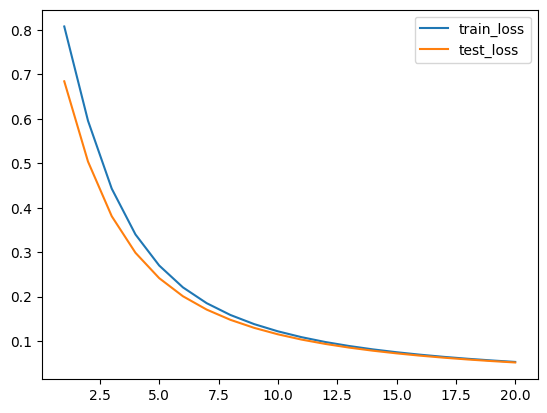

In [15]:
plt.plot(range(1,21),history.history["loss"],label="train_loss")
plt.plot(range(1,21),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model

In [16]:
predicted=model.predict(x_test) 
predicted   

4/4 [==============================] - 0s 4ms/step


array([[0.9578906 ],
       [0.04421734],
       [0.0738669 ],
       [0.94198287],
       [0.04395061],
       [0.9552263 ],
       [0.10130221],
       [0.9602761 ],
       [0.05872829],
       [0.95896405],
       [0.03920735],
       [0.94655085],
       [0.96189284],
       [0.04222372],
       [0.94579947],
       [0.04650014],
       [0.9494414 ],
       [0.9589562 ],
       [0.92588264],
       [0.04564335],
       [0.94682   ],
       [0.06667702],
       [0.05284617],
       [0.91038257],
       [0.93928814],
       [0.04432881],
       [0.92865986],
       [0.9547338 ],
       [0.04344739],
       [0.9496279 ],
       [0.03733588],
       [0.9525322 ],
       [0.9591415 ],
       [0.95527875],
       [0.03742219],
       [0.08053204],
       [0.07185252],
       [0.9471848 ],
       [0.04265   ],
       [0.03768404],
       [0.0488698 ],
       [0.04495861],
       [0.06780911],
       [0.03934105],
       [0.9451297 ],
       [0.95760864],
       [0.07527494],
       [0.961

In [17]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

## Evaluating the model 

1.0


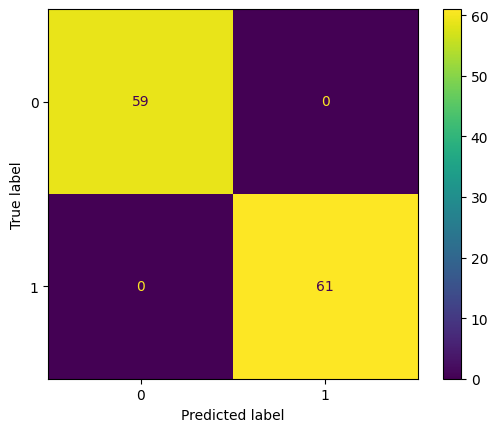

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

### PLOTING THE DECISION SURFACE 

In [19]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 27s 3ms/step


<Axes: >

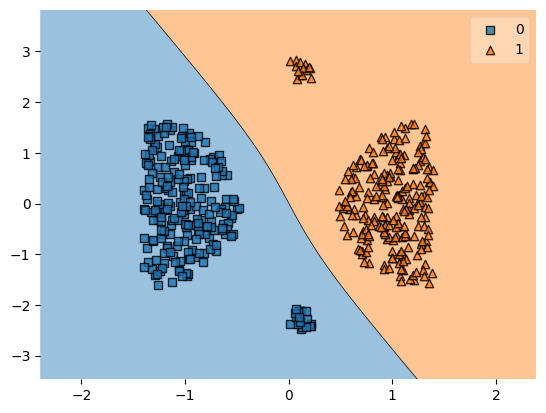

In [20]:
plot_decision_regions(x_train,y_train.values,clf=model)  

9600/9600 [==============================] - 27s 3ms/step


<Axes: >

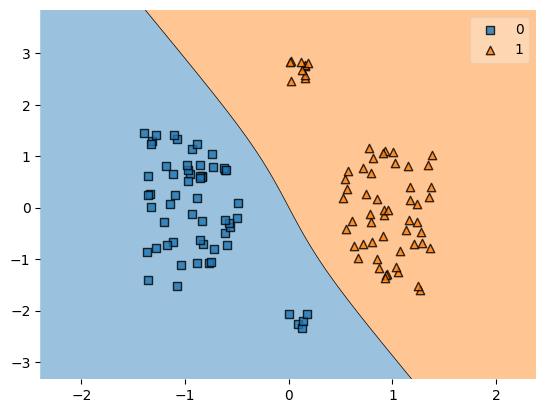

In [21]:
plot_decision_regions(x_test,y_test.values,clf=model)  

## Conclusions:

###### This neural network model achieves an accuracy of 100%. The model architecture consists of 2 hidden layers with the following specifications:

- In the first hidden layer, there are 18 neurons with the tanh activation function 
- In the second hidden layer, there are 16 neurons with the tanh activation function 

###### The output layer uses the sigmoid activation function.

##### For model compilation, the following settings were used:

###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 20 epochs.
 
###### Overall, this neural network model architecture and training configuration achieve an accuracy of 100%.  

